In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: State Hypotheses

Null: the probability that she picks correctly, is just as likely as her to pick wrongly. She cannot distinguish between whether tea or milk were added first with any consistency beyond randomness.

Alternate: The probability that she picks correctly is different than the prob she picks incorrectly.She can distinguish between the two.


Step 2: Test Statistic

x= The number of times she correctly picked tea first

Hypergeometric dist: binomial distribution without replacement

Xobs=3

X~Hypergeom('trials'  M=8, 'successes' n=4, 'number being picked at random' N=4)

In [2]:
M,n,N=8,4,4
stats.hypergeom.rvs(M,n,N,size=10)

array([1, 2, 3, 3, 2, 3, 2, 2, 2, 2])

Step 3: Find p-value


In [3]:
#using pmf
M,n,N=8,4,4
print("the p-value is ",stats.hypergeom.pmf([3,4],M,n,N).sum())

# using cdf
print("the p-value is ",1-stats.hypergeom.cdf(2,M,n,N).sum())

the p-value is  0.24285714285714263
the p-value is  0.24285714285714288


Step 4: Conclude

We fail to reject the null 

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [4]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: State hypotheses

Null: The mean sepal width of the virginica is no different than that of versicolor. Any variation is due to random chance

Alternate: The mean sepal width of the virginica is greater than that of the versicolor

Step 2: Test Statistic

Difference in sample means

observed difference= 0.204

if null is true,we should get a value near 0

Using simulation/ permutation test



Step 3: Test Statistic

In [6]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

In [7]:
num_obs=iris_sub.num_rows
ts=[]
for _ in np.arange(10000):
    iris_sample=iris_sub.with_column("sampled",iris_sub.sample(num_obs,with_replacement= False).column(1))
    ts=np.append(ts,np.diff(iris_sample.group(0,np.mean).column(2))[0])

Step 4: Conclude

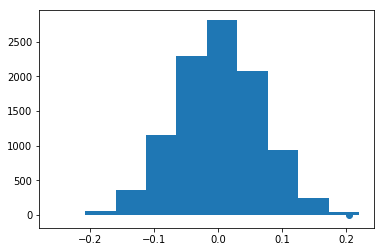

In [8]:
plt.hist(ts)
plt.scatter(obs,0)
plt.show()

In [9]:
np.mean(ts>=obs)

0.0009

We can reject the null because our p-value is extremely low
